# Understanding KNN

Outlines
* What is KNN ?
* What is Euclidean Distance?
* Mathematical equation for Euclidean Distance
* Building our KNN from scratch
* Applying our model to real world dataset

# What is KNN?

K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function).

Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors. As you increase the number of nearest neighbors, the value of k, accuracy might increase

#  KNN

![](knn.jpg)

# What Is Euclidean Distance?

Euclidean distance is the distance between two points. To find the two points on a plane, the length of a segment connecting the two points is measured

The Euclidean distance formula, as its name suggests, gives the distance between two points (or) the straight line distance. Let us assume that (x1,y1) and (x2,y2) are two points in a two-dimensional plane.

# Mathematical Expression for Euclidean distance


d = √[ (x2 – x1)2 + (y2 – y1)2]


![](euclidean.png)

KNN calculates the Euclidean distance between two points 

# Building KNN 

In [158]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import style
style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split

In [159]:
#let us assume these two points;
p1 = (1,4)
p2 = (4,8)

Euclidean_distance = sqrt(((p2[0]- p1[0])**2)+ ((p2[1]-p1[1])**2))
Euclidean_distance

5.0

In [160]:
#using an imaginary data
dataset = {'k':[[3,2],[2,1],[1,3]], 'r':[[5,6],[6,7],[7,8]]}
new = [4,6]

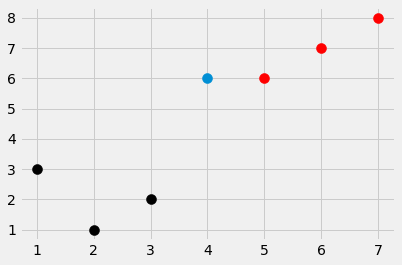

In [161]:
for d in dataset:
    for dd in dataset[d]:
        plt.scatter(dd[0],dd[1], s= 100, color = d)
plt.scatter(new[0],new[1], s= 100)        
plt.show()        

Just looking at the above graph, we could easily say the blue point belongs to the red group as it close to them i.e their neighbor, however, let us apply our KNN algorithm to decide the group it belongs 

In [162]:
def k_nearest_neighbor(data, predict, k=3):
    distances = []
    for d in data:
        for features in data[d]:
            #euclidean distance = sqrt((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2)
            euclidean_distance = np.linalg.norm(np.array(features)- np.array(predict))
            distances.append([euclidean_distance, d])
     
    votes = [d[1] for d in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

result = k_nearest_neighbor(dataset, new, k=3)
print(result)
        
        

r


The first formula for euclidean distance(which is commented) is the basic formula for calculating euclidean distance, and only allows limited features(2), while the second allows for more than 2 features, both formula will be used for predictions for two features and three features respectively

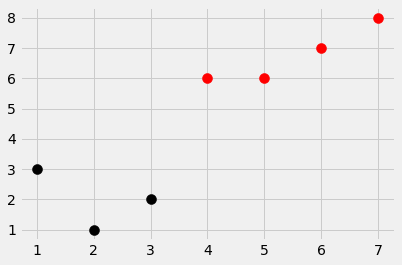

In [163]:
for d in dataset:
    for dd in dataset[d]:
        plt.scatter(dd[0],dd[1], s= 100, color = d)
plt.scatter(new[0],new[1], s= 100, color = result)        
plt.show()        

The above graph shows the result gotten from the KNN algorithm, the new point belongs the red group

# Applying KNN to real world predictions

Applying KNN to real world data, the dataset that will be used is Social_network_ads, it has a label column, [purchased] which tells whether or not a customer purchased a particular product, dataset can be gotten from https://www.kaggle.com/rakeshrau/social-network-ads

In [164]:
import pandas as pd
import numpy as np
import random

In [165]:
ads = pd.read_csv('Social_network_ads.csv')

In [166]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [167]:
ads['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [168]:
ads['Gender'].replace('Male',1, inplace=True)
ads['Gender'].replace('Female',2, inplace=True)


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X= ads.iloc[:,2:4].values
y= ads.iloc[:,-1].values

In [171]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaler = StandardScaler()

In [174]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
import operator
from collections import Counter

In [176]:
from math import sqrt

In [177]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        print('training done')
        
    def predict(self, X_test):
        distance = {}
        counter = 1
        
        for i in self.X_train:
            distance[counter] = sqrt((X_test[0][0]-i[0])**2 + (X_test[0][1]- i[1])**2)
            counter = counter + 1 
        distance = sorted(distance.items(), key = operator.itemgetter(1))
        self.classify(distance = distance[:self.k]) #when k is set to x, x number of distances are selected
    
    def classify (self,distance):
        label = []
        
        for i in distance:
            label.append(self.y_train[i[0]]) #this selects a corresponding label for the distances
            
        print(Counter(label).most_common()[0][0])  
        
        

I created a class which has multiple functions, the predict function will take an array of two features ['age'] and ['Salary'] 

In [178]:
knn = KNearestNeighbors(k = 5)

In [179]:
knn.fit(X_train, y_train)

training done


In [180]:
knn.predict(np.array([20, 5000]).reshape(1,2))

0


# Predicting on Multiple Features

In this prediction we have an additional feature ['gender'] to ['age'] and ['salary'] 

# Solar_network_ads dataset

In [181]:
ads = ads.astype(float).values.tolist()
random.shuffle(ads)

In [182]:
test_size = 0.2
train_label = {0:[],1:[]}
test_label = {0:[],1:[]}
train_data = ads[:-int(test_size*len(ads))] #this takes all the data up to the 20% of len(dataset) i.e it takes 80% of the data
test_data = ads[-int(test_size * len(ads)):]#this takes 20% of len(dataset)

In [183]:
for i in train_data:
    train_label[i[-1]].append(i[:-1]) # here i am populating the training dictionary based on the labels 0 and 1  
    
for i in test_data:
    test_label[i[-1]].append(i[:-1])
        
    

In [184]:
correct = 0
total = 0
for group in test_label:
    for data in test_label[group]:
        vote = k_nearest_neighbor(train_label, data, k = 9)
        if group == vote:
            correct +=1
        total +=1
        
print('accuracy: ', correct/total)        

accuracy:  0.7625


Note that the function k_nearest_neighbour has been defined earlier and was used for the initial classification of a point on the graph, the formula is;  euclidean_distance = np.linalg.norm(np.array(features)- np.array(predict)) 

# Breast_Cancer_winsconsin dataset

In [185]:
cancer = pd.read_csv('data.csv')

In [186]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [187]:
cancer.drop(columns = ['Unnamed: 32', 'id'], inplace = True)

In [188]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [189]:
cancer['diagnosis'].replace('B', 1, inplace = True)
cancer['diagnosis'].replace('M', 2, inplace = True)

In [190]:
cancer = cancer.astype(float).values.tolist()
random.shuffle(ads)

In [191]:
test_size = 0.2
train_label = {1:[],2:[]}
test_label = {1:[],2:[]}
train_data = cancer[:-int(test_size*len(cancer))]
test_data = cancer[-int(test_size * len(cancer)):]

In [192]:
for i in train_data:
    train_label[i[0]].append(i[1:])
    
for i in test_data:
    test_label[i[0]].append(i[1:])
        
    

In [193]:
correct = 0
total = 0
for group in test_label:
    for data in test_label[group]:
        vote = k_nearest_neighbor(train_label, data, k = 9)
        if group == vote:
            correct +=1
        total +=1
        
print('accuracy: ', correct/total)        

accuracy:  0.9292035398230089


# Iris dataset

In [194]:
iris = pd.read_csv('Iris.csv')

In [195]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [196]:
iris.drop(columns = ['Id'], inplace = True)

In [197]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [198]:
iris['Species'].replace('Iris-setosa',1, inplace = True)
iris['Species'].replace('Iris-versicolor',2, inplace = True)
iris['Species'].replace('Iris-virginica',3, inplace = True)

In [199]:
iris = iris.astype(float).values.tolist()
random.shuffle(iris)

In [200]:
test_size = 0.3
train_label = {1:[],2:[], 3:[]}
test_label = {1:[],2:[], 3: []}
train_data = iris[:-int(test_size*len(iris))] 
test_data = iris[-int(test_size * len(iris)):]

In [201]:
for i in train_data:
    train_label[i[-1]].append(i[:-1]) 
    
for i in test_data:
    test_label[i[-1]].append(i[:-1])
        
    

In [203]:
correct = 0
total = 0
for group in test_label:
    for data in test_label[group]:
        vote = k_nearest_neighbor(train_label, data, k =9 )
        if group == vote:
            correct +=1
        total +=1
        
print('accuracy: ', correct/total)        

accuracy:  0.9777777777777777
